# Import libraries to be used for this project

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt

# Comments were Extracted from Youtube Comments section

# Extracted comments and identify the length per comments

In [3]:
yt_apple_community_comments.head()

,Comments,Length,Comments?
0,Which is your pick? iPhone 15 Pro Max or Samsu...,69,yes
1,For me it's about OS. So I'll stick to my s23 ...,343,yes
2,12:26 A point I would like to add regarding th...,400,yes
3,I’m coming back to some of these videos to sha...,1880,yes
4,"From everything I’ve seen, both phones are ver...",601,yes


# Using TextBlob as the library for Natural Language Processing (NLP)

In [4]:
from textblob import TextBlob

def sentiment_calc(comment):
    try:
        return TextBlob(comment).sentiment
    except:
        return None

# Scoring each comments Polarity and Subjectivity

In [5]:
##add sentiment score for each row
yt_apple_community_comments['sentiment_score'] = yt_apple_community_comments['Comments'].apply(sentiment_calc)

##tabulate polarity and subjectivity
sentiment_series = yt_apple_community_comments['sentiment_score'].tolist()
columns = ['polarity', 'subjectivity']
new = pd.DataFrame(sentiment_series, columns=columns, index=yt_apple_community_comments.index)

##insert to table tabulated polarity and subjectivity
yt_apple_community_comments["polarity"] = new["polarity"]
yt_apple_community_comments["subjectivity"] = new["subjectivity"]

##drop old sentiment score column
yt_apple_community_comments = yt_apple_community_comments.drop(['sentiment_score'], axis=1)

yt_apple_community_comments.shape

(697, 5)

# Output 

In [6]:
yt_apple_community_comments.head(10)

,Comments,Length,Comments?,polarity,subjectivity
0,Which is your pick? iPhone 15 Pro Max or Samsu...,69,yes,0.000000,0.000000
1,For me it's about OS. So I'll stick to my s23 ...,343,yes,0.257143,0.467143
2,12:26 A point I would like to add regarding th...,400,yes,0.018750,0.440625
3,I’m coming back to some of these videos to sha...,1880,yes,0.213072,0.488154
4,"From everything I’ve seen, both phones are ver...",601,yes,0.304444,0.457265
5,People are really gettin heated over which pho...,466,yes,0.199188,0.446753
6,"Great comparison and depth analysis, Saf. Alwa...",198,yes,0.366667,0.434524
7,"I find the S23 Ultra superior in most ways, he...",840,yes,0.165606,0.503333
8,There is simply nothing Apple can do to make m...,159,yes,0.279167,0.639286
9,I've been using the s23 Ultra for about a mont...,968,yes,0.388249,0.515067


Grouping comments based on polarity score
less than 0 = Negative
more than 0 = positive
equal to 0 = Neutral

In [7]:
def flag_df(yt_apple_community_comments):
    if (yt_apple_community_comments['polarity'] < 0 ):
        return 'Negative'
    elif (yt_apple_community_comments['polarity'] > 0 ):
        return 'Positive'
    elif (yt_apple_community_comments['polarity'] == 0 ):
        return 'Neutral'
    else: 
        return 'unk'
    
yt_apple_community_comments['Flag'] = yt_apple_community_comments.apply(flag_df, axis = 1)

In [8]:
yt_apple_community_comments.shape

(697, 6)

In [9]:
yt_apple_community_comments.head()

,Comments,Length,Comments?,polarity,subjectivity,Flag
0,Which is your pick? iPhone 15 Pro Max or Samsu...,69,yes,0.000000,0.000000,Neutral
1,For me it's about OS. So I'll stick to my s23 ...,343,yes,0.257143,0.467143,Positive
2,12:26 A point I would like to add regarding th...,400,yes,0.018750,0.440625,Positive
3,I’m coming back to some of these videos to sha...,1880,yes,0.213072,0.488154,Positive
4,"From everything I’ve seen, both phones are ver...",601,yes,0.304444,0.457265,Positive


# Summarize comment counts per group

In [10]:
group_sentiment = yt_apple_community_comments.groupby(["Flag"], ).agg({"Comments":"count"})
group_sentiment = group_sentiment.reset_index()
group_sentiment

,Flag,Comments
0,Negative,120
1,Neutral,156
2,Positive,421


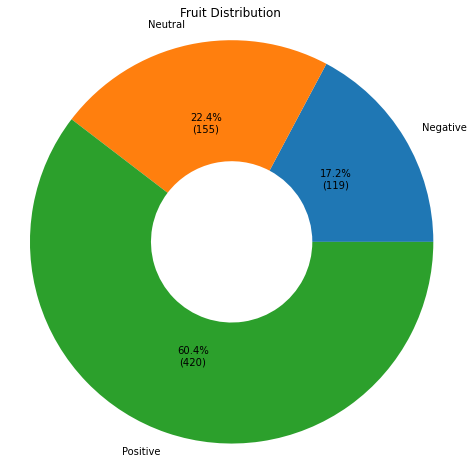

In [11]:
# Calculate percentages
group_sentiment['Percentage'] = group_sentiment['Comments'] / group_sentiment['Comments'].sum() * 100

# Define a custom label function to display both count and percentage
def custom_label(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return f"{pct:.1f}%\n({absolute})"

# Create the donut chart
plt.figure(figsize=(8, 8))
plt.pie(group_sentiment['Percentage'], labels=group_sentiment['Flag'], autopct=lambda pct: custom_label(pct, group_sentiment['Comments']),
        wedgeprops=dict(width=0.6))
plt.title("Fruit Distribution")
plt.axis('equal')  # Ensure circular shape
plt.show()


# Analyzing the 421 positive comments using NLP 

In [12]:
positive_sentiments = yt_apple_community_comments[yt_apple_community_comments["Flag"]=="Positive"]
positive_sentiments.shape

(421, 6)

In [13]:
positive_sentiments.dtypes

Comments         object
Length            int64
Comments?        object
polarity        float64
subjectivity    float64
Flag             object
dtype: object

In [14]:
positive_sentiments.head()

,Comments,Length,Comments?,polarity,subjectivity,Flag
1,For me it's about OS. So I'll stick to my s23 ...,343,yes,0.257143,0.467143,Positive
2,12:26 A point I would like to add regarding th...,400,yes,0.018750,0.440625,Positive
3,I’m coming back to some of these videos to sha...,1880,yes,0.213072,0.488154,Positive
4,"From everything I’ve seen, both phones are ver...",601,yes,0.304444,0.457265,Positive
5,People are really gettin heated over which pho...,466,yes,0.199188,0.446753,Positive


# Remove stop words from comments

In [15]:
##library application
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

##apply to dataframe
stop_words = stopwords.words('english')
positive_sentiments['w_o_stop_words'] = positive_sentiments['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
positive_sentiments.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rolando.rf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-15-e7d49fa5a6c0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_sentiments['w_o_stop_words'] = positive_sentiments['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


,Comments,Length,Comments?,polarity,subjectivity,Flag,w_o_stop_words
1,For me it's about OS. So I'll stick to my s23 ...,343,yes,0.257143,0.467143,Positive,For OS. So I'll stick s23 ultra. Performance p...
2,12:26 A point I would like to add regarding th...,400,yes,0.018750,0.440625,Positive,12:26 A point I would like add regarding actio...
3,I’m coming back to some of these videos to sha...,1880,yes,0.213072,0.488154,Positive,I’m coming back videos share experience phones...
4,"From everything I’ve seen, both phones are ver...",601,yes,0.304444,0.457265,Positive,"From everything I’ve seen, phones comparable n..."
5,People are really gettin heated over which pho...,466,yes,0.199188,0.446753,Positive,People really gettin heated phone better hilar...


# Lemmatize column w/o stop words

In [16]:
##library application
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)
positive_sentiments['lemmatize_words'] = positive_sentiments['w_o_stop_words'].apply(lemmatize_words)

##df['clean_lemmatize_words'] = df['lemmatize_words'].str.replace('.', '')
positive_sentiments['lemmatize_words'] = positive_sentiments['lemmatize_words'].str.replace('\W', ' ', regex=True)

positive_sentiments.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rolando.rf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-16-12be61791774>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_sentiments['lemmatize_words'] = positive_sentiments['w_o_stop_words'].apply(lemmatize_words)
<ipython-input-16-12be61791774>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_sentiments['lemmatize_words'] = positive_sentiments['lemmatize_words'].str.r

,Comments,Length,Comments?,polarity,subjectivity,Flag,w_o_stop_words,lemmatize_words
1,For me it's about OS. So I'll stick to my s23 ...,343,yes,0.257143,0.467143,Positive,For OS. So I'll stick s23 ultra. Performance p...,For OS So I ll stick s23 ultra Performance p...
2,12:26 A point I would like to add regarding th...,400,yes,0.018750,0.440625,Positive,12:26 A point I would like add regarding actio...,12 26 A point I would like add regard action b...
3,I’m coming back to some of these videos to sha...,1880,yes,0.213072,0.488154,Positive,I’m coming back videos share experience phones...,I m come back videos share experience phone I ...
4,"From everything I’ve seen, both phones are ver...",601,yes,0.304444,0.457265,Positive,"From everything I’ve seen, phones comparable n...",From everything I ve seen phone comparable ni...
5,People are really gettin heated over which pho...,466,yes,0.199188,0.446753,Positive,People really gettin heated phone better hilar...,People really gettin heat phone better hilario...


In [17]:
positive_sentiments.head()

,Comments,Length,Comments?,polarity,subjectivity,Flag,w_o_stop_words,lemmatize_words
1,For me it's about OS. So I'll stick to my s23 ...,343,yes,0.257143,0.467143,Positive,For OS. So I'll stick s23 ultra. Performance p...,For OS So I ll stick s23 ultra Performance p...
2,12:26 A point I would like to add regarding th...,400,yes,0.018750,0.440625,Positive,12:26 A point I would like add regarding actio...,12 26 A point I would like add regard action b...
3,I’m coming back to some of these videos to sha...,1880,yes,0.213072,0.488154,Positive,I’m coming back videos share experience phones...,I m come back videos share experience phone I ...
4,"From everything I’ve seen, both phones are ver...",601,yes,0.304444,0.457265,Positive,"From everything I’ve seen, phones comparable n...",From everything I ve seen phone comparable ni...
5,People are really gettin heated over which pho...,466,yes,0.199188,0.446753,Positive,People really gettin heated phone better hilar...,People really gettin heat phone better hilario...


# Vectorize comments with bag of words

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(positive_sentiments['lemmatize_words'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(),
                columns = count_vectorizer.get_feature_names_out())
bag_of_words["Length"] = positive_sentiments["Length"]
bag_of_words["Comments"] = positive_sentiments["Comments"]
bag_of_words["polarity"] = positive_sentiments["polarity"]
bag_of_words.head(1)

,00,01,02,04,05,08,09,10,100,1000,...,youtubers,youve,yt,zenfone,zero,zoom,évolution,Length,Comments,polarity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [19]:
bag_words_table = bag_of_words.melt(id_vars=["Length","Comments","polarity"], 
                          var_name="keywords")

<ipython-input-19-bccd352761b6>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  bag_words_table = bag_of_words.melt(id_vars=["Length","Comments","polarity"],


In [20]:
bag_words_table_final = bag_words_table.groupby(["Length","Comments","keywords"],as_index=False).agg({"value":"sum","polarity":"mean"})
bag_words_table_final =bag_words_table_final[bag_words_table_final['value'] !=0]
bag_words_table_final.shape

(6430, 5)

# Check bag_words_table dataframe output 

In [21]:
bag_words_table_final.sort_values(by=['value'], ascending=False)

,Length,Comments,keywords,value,polarity
320513,165.0,I switched to apple this year. So all the feat...,apple,13,0.800000
389192,203.0,Very nice video Saf. I'm at the point now that...,pro,10,0.265000
387634,203.0,Very nice video Saf. I'm at the point now that...,15,10,0.265000
388863,203.0,Very nice video Saf. I'm at the point now that...,max,9,0.265000
388702,203.0,Very nice video Saf. I'm at the point now that...,iphone,9,0.265000
...,...,...,...,...,...
271209,145.0,"No competition at all S23 ultra all day , iPho...",subscribe,1,0.100000
271028,145.0,"No competition at all S23 ultra all day , iPho...",see,1,0.100000
270930,145.0,"No competition at all S23 ultra all day , iPho...",request,1,0.100000
270742,145.0,"No competition at all S23 ultra all day , iPho...",pewdiepie,1,0.100000


# Grouping the keywords based on product features

This will help to easily identify Samsung product features that is mostly appealing to iPhone users

In [22]:
##group words based on specs

specs_group = []

for aa in bag_words_table_final["keywords"]:
    if "display" in aa:
        bb = "display"
    elif "screen" in aa:
        bb = "screen"
    elif "resolution" in aa:
        bb = "resolution"
    elif "storage" in aa:
        bb = "storage"
    elif "memory" in aa:
         bb = "memory"
    elif "card" in aa:
         bb = "card"
    elif "camera" in aa:
         bb = "camera"
    elif "battery" in aa:
         bb = "battery"
    elif "snapdragon" in aa:
         bb = "snapdragon"
    elif "dragon" in aa:
         bb = "dragon"
    elif "pen" in aa:
         bb = "pen"
    elif "sim" in aa:
         bb = "sim"
    elif "sensors" in aa:
         bb = "sensors"
    elif "game" in aa:
         bb = "game"
    elif "gaming" in aa:
         bb = "gaming"
    elif "size" in aa:
         bb = "size"
    elif "trade" in aa:
         bb = "trade in"
    elif "price" in aa:
         bb = "price"
    elif "value" in aa:
         bb = "value"
    elif "color" in aa:
         bb = "color"
    elif "colour" in aa:
         bb = "color"
    else:
         bb = "others"
    specs_group.append(bb)
    
bag_words_table_final["specs_group"] = specs_group

In [23]:
bag_words_table_final.head(2)

,Length,Comments,keywords,value,polarity,specs_group
95,50.0,"My word Saf, that couldn't be more iPhone biased😂",5t,1,0.5,others
300,50.0,"My word Saf, that couldn't be more iPhone biased😂",best,1,0.5,others


Grouping the table by product features. Counting the keyword count (quantity) and getting the average polarity (quality) based on sentiments

In [44]:
positive_comments_final= bag_words_table_final.groupby(["specs_group"]).agg({"Comments":"count","polarity":"mean"})
positive_comments_final = positive_comments_final.reset_index()
positive_comments_final = positive_comments_final.sort_values(by='Comments', ascending=True, na_position='first')
positive_comments_final = positive_comments_final.drop(8)
positive_comments_final.head()

,specs_group,Comments,polarity
18,trade in,1,0.600000
16,snapdragon,1,0.265000
2,card,1,0.033333
11,resolution,1,0.228889
13,sensors,1,0.250000


In [45]:
total = positive_comments_final['Comments'].sum()
percentage = (positive_comments_final['Comments'] / total) * 100
positive_comments_final["percentage"] = percentage
positive_comments_final.head()

,specs_group,Comments,polarity,percentage
18,trade in,1,0.600000,0.606061
16,snapdragon,1,0.265000,0.606061
2,card,1,0.033333,0.606061
11,resolution,1,0.228889,0.606061
13,sensors,1,0.250000,0.606061


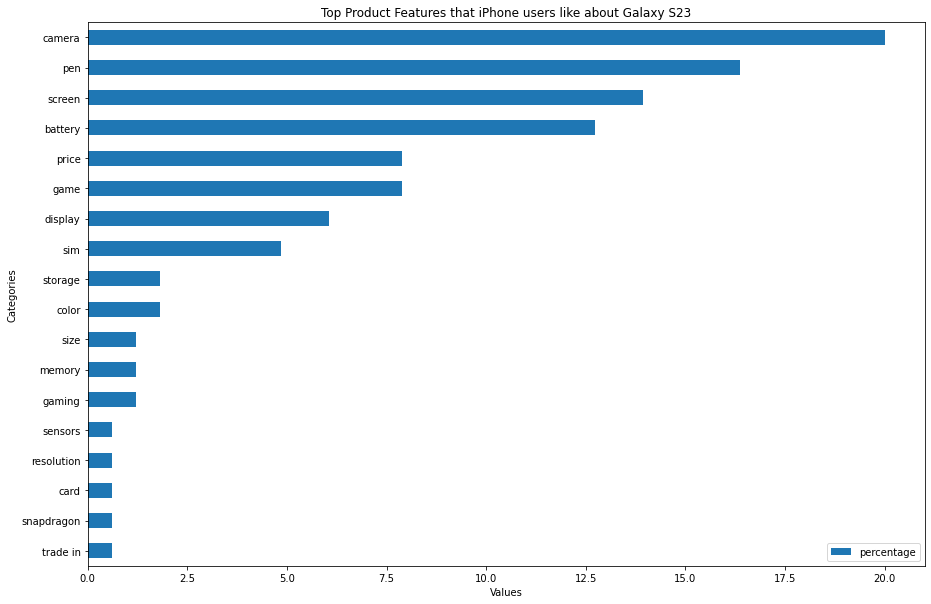

In [46]:
categories = positive_comments_final["specs_group"]
values = positive_comments_final["percentage"]

# Use DataFrame.plot.barh() for horizontal bar chart
positive_comments_final.plot.barh(x='specs_group', y='percentage', figsize=(15, 10))  # Adjust figure size as needed
plt.xlabel("Values")
plt.ylabel("Categories")
plt.title("Top Product Features that iPhone users like about Galaxy S23")
plt.show()

# What iPhone users like about S23?

Camera<br>
S Pen<br>
Screen<br>
Battery<br>
Gaming

# Where to use the above analysis?


Personalizing marketing messaging<br>
Where to improve iPhone product features<br>
Topical contents to use for Apple newsroom or article to resonate to Apple users

# Exploring the comments by top liked Galaxy S23 Features

In [47]:
pd.set_option('max_colwidth', None)

what iPhone users like about the camera?

In [48]:
yt_apple_community_comments[yt_apple_community_comments['Comments'].str.contains('camera')].head()

,Comments,Length,Comments?,polarity,subjectivity,Flag
7,"I find the S23 Ultra superior in most ways, hence why I have one. The Dynamic Island is a massive hindrance for fullscreen apps or videos. The camera in my opinion was better for the S23 Ultra here in pretty much every shot. The iPhone still has that weird yellow tint that just looks wrong. In terms of video both are close, the iPhone is heavily skewed towards social media with high contrast but that is something easily fixed in post if desired. The iPhone is technically faster, but I can do more on my phone in comparison to use that power. For these prices I just think the S23 Ultra is far ahead and the console games do not matter much too, they are not that smooth and the controls are nothing you'd want to use to really get an enjoyable experience. The iPhone does what the Samsung does, but the Samsung can still do a bit more.",840,yes,0.165606,0.503333,Positive
9,"I've been using the s23 Ultra for about a month or two, got it for $850 on Prime day, and one of the best features I've used is object eraser which is basically magic eraser from Google. I know it's not new to the s23 Ultra but it is really nice and useful and works pretty well, under reasonable conditions. The stylus is also very useful for this feature and useful for signing documents, doodling, drawing, taking notes, etc. Not used daily but it is nice when you want/need it. Can also be used as a portable camera button which is occasionally useful. I've also used the 200 MP mode a decent amount and it's great if you want to get stunning shots of some beautiful sights that you come across. You don't use it as your default because it would take a lot of storage, and processing time, but you use it when you see something picturesque. These are all really useful features when you want them that don't seem to get enough highlight, just an honorable mention.",968,yes,0.388249,0.515067,Positive
11,"Excellent video. Thank you for sharing your knowledge of these two. I was hesitating because of the camera in the Ultra even though I've been an Apple user for decades, but looking at some of the color and sharpness, I'm sticking to the iPhone! Megapixels aren't everything unless you're making a billboard!",307,yes,1.000000,1.000000,Positive
13,"I’ve been watching Saf since 2013 during the iPhone 5S days (in fact, I was even featured in one of his AskSaf videos lol). Over the years, I’ve seen people accuse him of being biased towards both Android and iPhone, especially with camera comparisons. As long as both sides are accusing him of being biased, I think he’s doing a good job!",339,yes,0.406250,0.675000,Positive
14,"I'm going with the better looking front first of all. The iPhone has a display with largely rounded corners and the pill. The Galaxy has a nice rectangular full tv like screen, with a punch hole. Next, I'm going with the camera. The superior zoom sealed it for me. S23 for the win. I have the Pixel 7 Pro and I opted for a great camera backed by sweet software at an unbeatable price. I do miss the OS on my OnePlus 10 Pro, not feeling the barebone Android that others seem to praise.",484,yes,0.456429,0.551190,Positive


what iPhone users like about the screen

In [49]:
yt_apple_community_comments[yt_apple_community_comments['Comments'].str.contains('screen')].head()

,Comments,Length,Comments?,polarity,subjectivity,Flag
3,"I’m coming back to some of these videos to share my experience with both these phones and why I chose one over the other. Maybe it will help someone else make their decision. I originally got the s23 ultra and ended up returning it for the 15 pro max. Technically I believe the s23 ultra is the more tech advanced phone and can do more but the iPhone feels more premium in hand and is more enjoyable to use in day to day tasks. The excitement of the s23 wore out quickly and it just felt like any other android phone. On the other hand the iPhone still impressed me with how premium it feels every time I pull it out of my pocket. Even just how the touch screen feels when you’re swiping around the Home Screen. I don’t know what it is but it just feels like a higher quality product. If you’re a heavy tech user and will actually use things like dex then you may want to go with the s23 but if you just use your phone to make calls, watch YouTube, scroll social media and connect with friends then I think the iPhone is the better experience. The s23 ultra is an absolute beast and will do all the things you want it to do but for me I didn’t use even half of the things it could do and it just didn’t feel as good doing the normal everyday things as the iPhone. I honestly believe most average people will enjoy using the iPhone over the ultra but if you will use all the features like dex I completely understand the appeal in the s23. Also I have not had any of the issues people are reporting about the 15. The s23 ultra is cooler during charging but my iPhone doesn’t get overly hot. I think the battery is better on the iPhone as well. On the ultra it seemed like every time I looked at my battery percentage it had ticked down another percent. My iPhone seems to just sip battery in comparison. I know that was a bit of a ramble but it’s early and I’m tired so forgive me.",1880,yes,0.213072,0.488154,Positive
6,"Great comparison and depth analysis, Saf. Always a pleasure watching your comparison videos. I am not a big phone guy. I will keep things simple so a 6.1"" screen is a perfect fit for my daily needs.",198,yes,0.366667,0.434524,Positive
7,"I find the S23 Ultra superior in most ways, hence why I have one. The Dynamic Island is a massive hindrance for fullscreen apps or videos. The camera in my opinion was better for the S23 Ultra here in pretty much every shot. The iPhone still has that weird yellow tint that just looks wrong. In terms of video both are close, the iPhone is heavily skewed towards social media with high contrast but that is something easily fixed in post if desired. The iPhone is technically faster, but I can do more on my phone in comparison to use that power. For these prices I just think the S23 Ultra is far ahead and the console games do not matter much too, they are not that smooth and the controls are nothing you'd want to use to really get an enjoyable experience. The iPhone does what the Samsung does, but the Samsung can still do a bit more.",840,yes,0.165606,0.503333,Positive
10,"Hey Saf, just wanted to point out an error in the Camera specs on screen. You put the S23 Ultra as having an F1.8 aperture lens, it should be F1.7. I think the F1.7 vs the iPhone's F1.78 should be taken into account if we're comparing the 0.02 difference between the Samsung's 1/1.3 and the iPhone's 1/1.28 sensors.",315,yes,0.000000,0.000000,Neutral
14,"I'm going with the better looking front first of all. The iPhone has a display with largely rounded corners and the pill. The Galaxy has a nice rectangular full tv like screen, with a punch hole. Next, I'm going with the camera. The superior zoom sealed it for me. S23 for the win. I have the Pixel 7 Pro and I opted for a great camera backed by sweet software at an unbeatable price. I do miss the OS on my OnePlus 10 Pro, not feeling the barebone Android that others seem to praise.",484,yes,0.456429,0.551190,Positive


what iPhone users like about the s pen

In [50]:
yt_apple_community_comments[yt_apple_community_comments['Comments'].str.contains('pen')].head()

,Comments,Length,Comments?,polarity,subjectivity,Flag
5,People are really gettin heated over which phone is better it is hilarious tbh. Both phones are top notch and can serve you for next 5 years without any issues. There are no more major updates if you compare phones every single year. Both phones can do everything you want at top level so comparing them tbh is so pointless. Tbh it all depends on preference if u prefer iOs and apple ecosystem or freedom from Android everything else is literally top on both phones.,466,yes,0.199188,0.446753,Positive
22,"@SuperSaf, the power button on the S23 Ultra can be set up to open any app on the phone, unlike the iPhone's action button, which has a limited number of apps. Android phones have had this for ages.",198,yes,0.009524,0.247619,Positive
26,"After using an iPhone for work and a Samsung for personal use for the last four years, I still like Android better. I just feel like I have more control over the phone. And I don't use the S pen a lot, but when I need it, I need it. Very happy with my s23 Ultra.",262,yes,0.400000,0.473333,Positive
31,You can customize buttom patterns on the 23 ultra to open apps and you can just take a picture with the volume button you could do it when there was still a Bixby button,169,yes,0.000000,0.500000,Neutral
39,"For me, the advantage of using a stylus in a Fab with gloves on is way better than not using the stylus. The gloves will cover more letters. One more thing, the USB cable that comes with the iPhone 15 Pro Max is the slower USB 2 speeds. You HAVE to buy a new Apple cable if you want USB 3 speeds. For the Samsung, you get it automatically. Apple needs to recover the money spent on getting USB-C.",396,yes,0.307273,0.410909,Positive
